<a href="https://colab.research.google.com/github/claarr/DataAnalyst-GreatEdu/blob/main/Sertifikasi_BNSP_Clarita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BUSINESS UNDERSTANDING**

Customer churn atau kehilangan pelanggan adalah salah satu masalah terbesar dalam bisnis. Sektor perbankan
merupakan salah satu sektor dengan persaingan yang sangat ketat. Churn rate ratio per bulannya cukup tinggi,
artinya bank kehilangan cukup banyak nasabahnya karena menutup rekening atau pindah ke bank lain. Hal ini
menjadi masalah karena persentase nasabah yang hilang tersebut sangat memengaruhi growth rate bank.

Tujuan analisis ini melakukan prediksi terhadap kemungkinan
nasabah meninggalkan bank (churn) atau tidak. Diharapkan pemodelan yang dihasilkan dapat membantu bank
dalam memahami berapa banyak pelanggan yang meninggalkan bank, dan mengapa mereka keluar. Ini penting
dalam menyusun strategi pemasaran dan retensi nasabah bank.

# **1. MENGUMPULKAN DATA**

### Kebutuhan Data

Untuk membangun model klasifikasi customer churn memerlukan beberapa data seperti informasi identifikasi nasabah, informasi finansial dan transaksional, informasi lokasi dan geografis, target variabel.

- RowNumber = nomor baris dari 1 hingga 10000

1. Identifikasi nasabah
    - CustomerID = id unik untuk identifikasi nasabah
    - Surname = nama belakang nasabah
    - Gender = jenis kelamin nasabah (pria atau wanita)
    - Age = umur nasabah
    - Tenure = jumlah tahun di mana pelanggan telah bersama bank

2. Financial dan transaksional
    - CreditScore = skor kredit nasabah
    - Balance = saldo bank nasabah
    - NumOfProducts = jumlah produk bank yang digunakan nasabah
    - HasCrCard = binary flag (1 = ya, 0 = tidak) apakah pelanggan memegang kartu kredit dengan bank atau tidak
    - IsActiveMember = binary flag (1 = ya, 0 = tidak) apakah pelanggan adalah anggota aktif bank atau tidak
    - EstimatedSalary = perkiraan gaji pelanggan dalam Dolar

3. Lokasi dan geografis
    - Geography = negara tempat nasabah berada

4. Variabel Target
    - Exited = binary flag (1 = ya, 0 = tidak) jika pelanggan menutup rekening di bank


### Pengambilan Data

Dataset sudah disediakan dalam link github https://github.com/arubhasy/dataset/blob/main/Bank_Churn_Modelling.csv . Data tersebut sudah dalam bentuk CSV. Download data tersebut lalu masukkan ke GDrive. Untuk proses pengambilan data dilakukan di Google Collabs dengan menyambungkan Google Collabs ke Gdrive, lalu panggil datanya menggunakan librabry python yaitu pandas.

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Kampus Merdeka/Bank_Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


# **2. MENELAAH DATA**

In [46]:
# Melihat jumlah baris dan kolom
df.shape

(10000, 14)

Data memiliki 10.000 baris dan 14 kolom

In [47]:
# Cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9997 non-null   object 
 6   Age              9997 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Dalam dataset terdapat 3 macam tipe data yaitu 3 float, 8 integer, dan 3 object. Variabel Geograph dan Gender masih dalam bentuk object, jika ingin dimasukkan ke dalam analisis perlu ditransformasi dalam bentuk numerik.

In [48]:
# Cek data duplikat
df.duplicated().sum()

0

Dataset tidak memiliki data yang duplikat

In [49]:
# Cek data null
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             3
Age                3
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Dataset memiliki data null pada varibael Age dan Gender

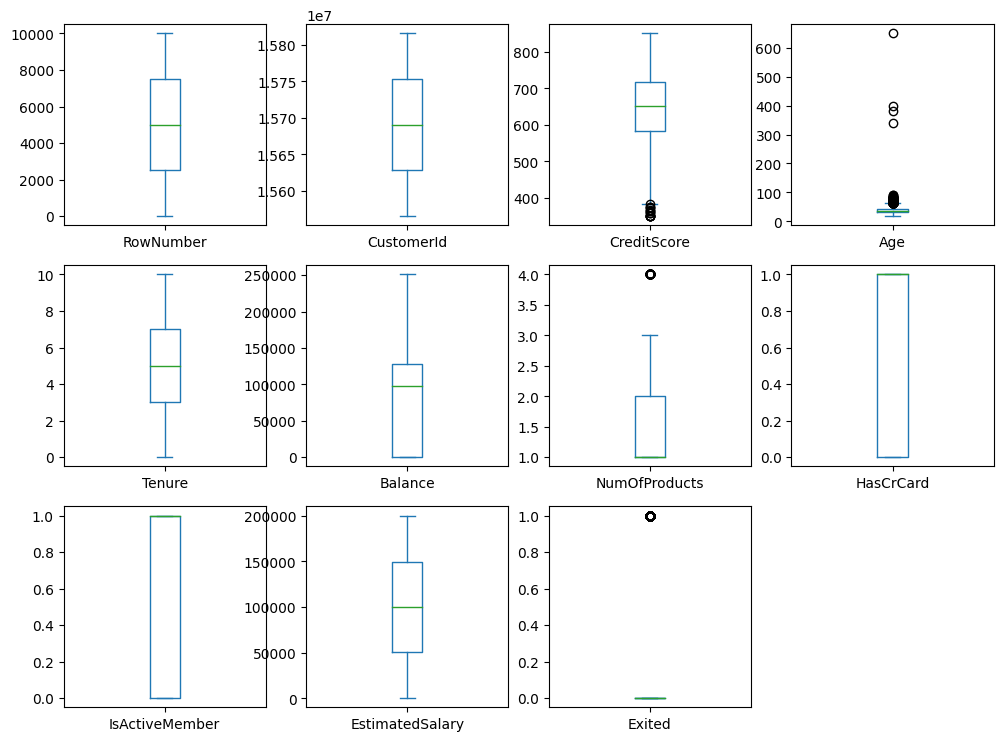

In [50]:
#Cek adanya outlier
import matplotlib.pyplot as plt

df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(12, 12))
plt.show()

Pengecekan outlier menggunakan boxplot, dilihat berdasarkan hasilnya terdapat outlier pada variabel Age yang memiliki nilai lebih dari 100. Pada variabel CreditScore ada juga outlier tapi tidak saya atasi karena menurut saya outlier pada variabel tersebut merupakan nilai yang valid dan bukan kesalahan. Misalnya, beberapa pelanggan mungkin memiliki skor kredit yang sangat tinggi yang jauh dari rata-rata. Menghapus atau mengubah nilai-nilai ini bisa menghilangkan informasi penting.

In [51]:
# Cek statistik dasar
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,9997.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,39.078223,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,13.453129,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,650.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


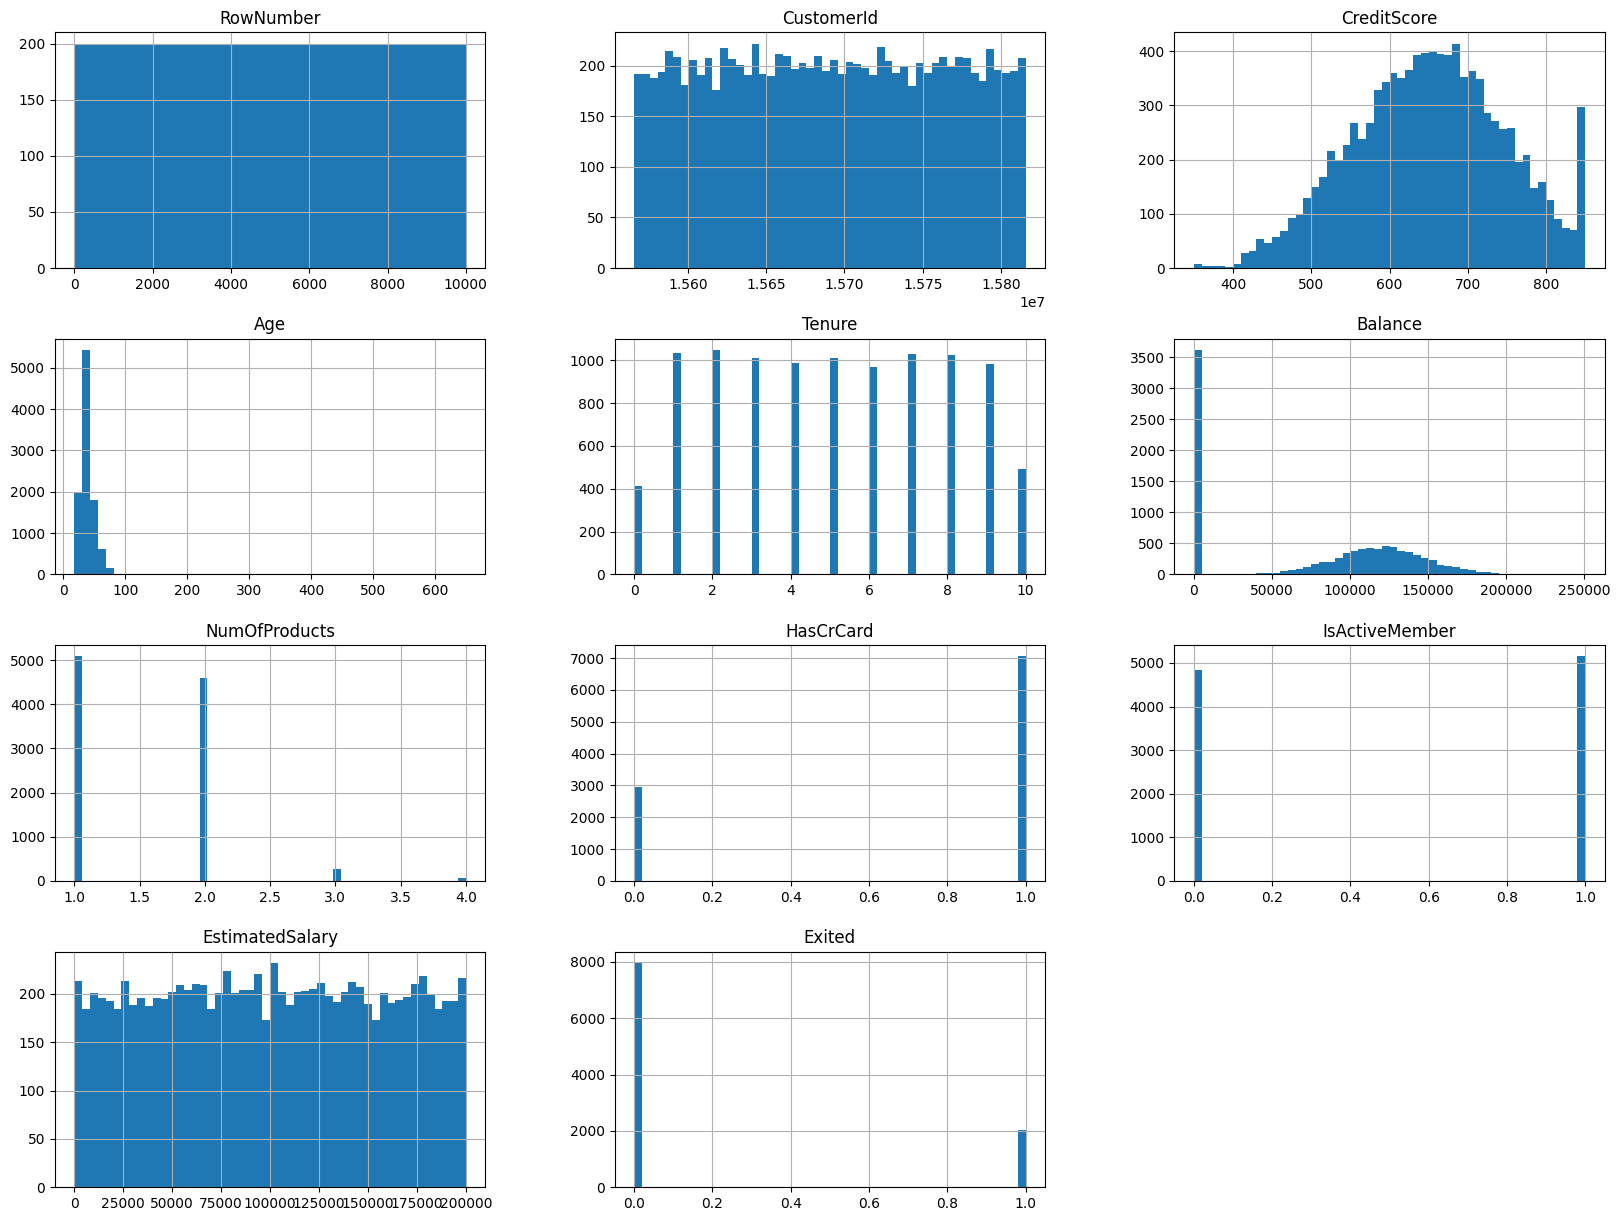

In [52]:
# Melihat distribusi data (histogram)
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20, 15))

# Simpan gambar ke file
plt.savefig('distribusi data.png')
plt.show()

Melihat distribusi data menggunakan histogram untuk memahami sebaran data yang digunakan.

# **3. MEMVALIDASI DATA**

Berdasarkan telaah pada dataset yang digunakan, kecukupan data untuk dilakukan analisis klasifikasi sudah mencukupi tetapi ada 3 variabel yang tidak perlu dijadikan variabel predict untuk klasifikasi yaitu pada RowNumber, CustomerId, dan Surname. Namun, pada kualitas data masih memiliki beberapa kekurangan seperti,
- adanya ketidaksesuaian tipe data yang nantinya tidak bisa dilakukan modelling
- adanya data null pada variabel Gender dan Age
- adanya outlier pada variabel Age

**Rekomendasi** yang dapat saya berikan adalah dengan melakukan pembersihan data untuk mengatasi kekurangan yang ada seperti,
- mengubah tipe data menjadi numerik
- menngisi data null pada variabel Gender dan Age menggunakan median
- menghilangkan outlier ada variabel Age
- Menghapus variabel RowNumber, CustomerId, dan Surname

# **4. MENENTUKAN OBJEK DATA**

Dataset memiliki 14 variabel dengan 13 variabel predictor dan 1 varibael target. Berdasarkan tabel informasi fitur, sudah dijelaskan bahwa yang menjadi variabel target adalah variabel Exited sedangkan sisanya varibael predictor. Analisis memiliki kriteria bahwa yang bisa dilakukan untuk pemodelan adalah variabel dengan tipe data numerik dan nominal, serta harus memiliki hubungan langsung terhadap variabel target. Dalam hal ini variabel RowNumber, CustomerId, dan Surname tidak memenuhi kriteria tersebut.

In [53]:
# Drop predictor yang tidak berkaitan dengan target
df.drop(["RowNumber","CustomerId","Surname"], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [54]:
df.shape

(10000, 11)

# **5. MEMBERSIHKAN DATA**

## Mengatasi Oulier

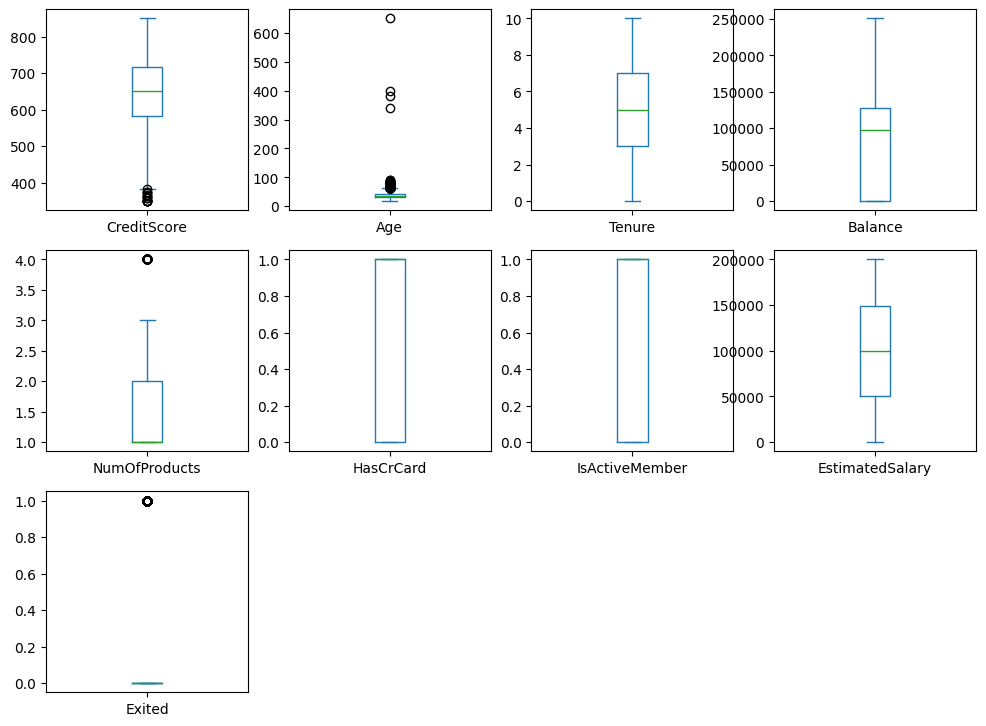

In [55]:
import matplotlib.pyplot as plt

df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(12, 12))
plt.show()

In [56]:
outliers = df[df['Age'] > 100]
print("Jumlah outlier usia lebih dari 100:", len(outliers))

Jumlah outlier usia lebih dari 100: 4


In [57]:
outliers

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1180,621,France,Male,340.0,6,0.00,2,1,1,99128.13,0
1312,542,France,Male,380.0,8,65942.26,1,1,1,68093.23,1
1439,778,France,Female,650.0,7,0.00,1,1,1,77867.23,0
1568,676,France,Male,400.0,8,114005.78,1,1,1,67998.45,0


In [58]:
df.drop(df[df['Age'] > 100].index, inplace=True)

In [59]:
outliers = df[df['Age'] > 100]
print("Jumlah outlier usia lebih dari 100:", len(outliers))

Jumlah outlier usia lebih dari 100: 0


## Mengubah Tipe Data Gender

Gender memiliki nilai Female, Male, M, dan F. varibael Gender ini akan dirubah tipe datanya menjadi numerik agar bisa dilakukan treatment terhadapa missing value

In [60]:
df["Gender"].unique()

array(['Female', 'Male', 'M', 'F', nan], dtype=object)

In [61]:
df['Gender'] = df['Gender'].replace({'Male': 0,
                                     'Female': 1,
                                     'M': 0,
                                     'F': 1})

In [62]:
df["Gender"].unique()

array([ 1.,  0., nan])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9996 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9996 non-null   int64  
 1   Geography        9996 non-null   object 
 2   Gender           9993 non-null   float64
 3   Age              9993 non-null   float64
 4   Tenure           9996 non-null   int64  
 5   Balance          9996 non-null   float64
 6   NumOfProducts    9996 non-null   int64  
 7   HasCrCard        9996 non-null   int64  
 8   IsActiveMember   9996 non-null   int64  
 9   EstimatedSalary  9996 non-null   float64
 10  Exited           9996 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 937.1+ KB


## Mengisi Data Null

In [64]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             3
Age                3
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [65]:
df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9996.000000,9993.000000,9993.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,650.527311,0.454418,38.916742,5.011905,76498.493882,1.530312,0.705382,0.514906,100098.970765,0.203681
std,96.657346,0.497943,10.485658,2.892359,62399.291663,0.581679,0.455894,0.499803,57519.782484,0.402755
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50974.077500,0.000000
50%,652.000000,0.000000,37.000000,5.000000,97221.520000,1.000000,1.000000,1.000000,100238.110000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127651.035000,2.000000,1.000000,1.000000,149400.107500,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [66]:
# Mengisi data null dengan median
df.fillna({'Age': 37,
           'Gender' : 0}, inplace=True)
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# **6. MENGKONSTRUKSI DATA**

Digunakan untuk mengubah data kategorik yang masih dalam bentuk object menjadi nominal/integer. Variabel Gender dan Geography akan dilakukan transformasi

In [67]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [68]:
df['Geography'] = df['Geography'].replace({'France': 1, 'Spain': 2, 'Germany': 3})
#Gender tidak dimasukkan kembali karena sudah di transformasi pada bagian Data Cleaning

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9996 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9996 non-null   int64  
 1   Geography        9996 non-null   int64  
 2   Gender           9996 non-null   float64
 3   Age              9996 non-null   float64
 4   Tenure           9996 non-null   int64  
 5   Balance          9996 non-null   float64
 6   NumOfProducts    9996 non-null   int64  
 7   HasCrCard        9996 non-null   int64  
 8   IsActiveMember   9996 non-null   int64  
 9   EstimatedSalary  9996 non-null   float64
 10  Exited           9996 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 937.1 KB


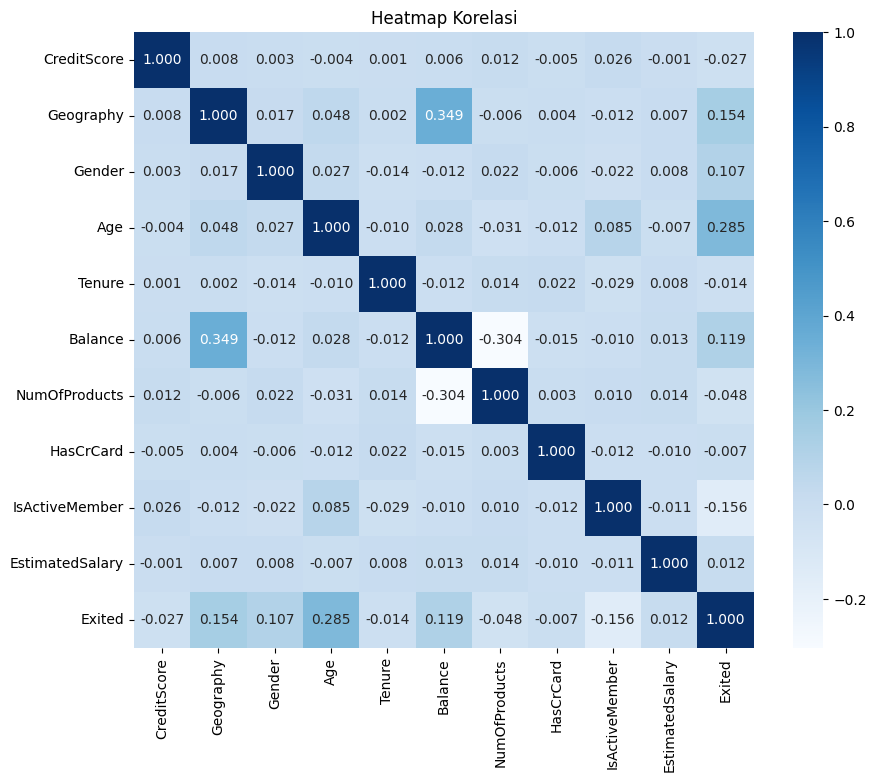

In [70]:
# Korelasi
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="Blues", fmt='.3f')
plt.title('Heatmap Korelasi')

# Simpan gambar ke file
plt.savefig('correlation.png')
plt.show()

Jika dilihat hasil korelasinya, korelasi memliki persebaran yang hampir merata. Deketahui bahwa variabel yang memiliki pengaruh paling besar pada varibael target (Exited) adalah Age sebesar 0.29, dan variabael yang memiliki pengaruh paling kecil adalah Estimated Salary sebesar 0.12

# **7. PELABELAN DATA**

Dalam dataset, variabel khususnya variabel target sudah memiliki label, beberapa variabel predictor seperti HasCrCard, IsActiveMembersudah memliki label, berikut penjelasan label nya

- Exited: Ini adalah variabel target Anda. Nilai 0 (False) menunjukkan bahwa pelanggan masih bertahan (Retained), sedangkan nilai 1 (True) menunjukkan bahwa pelanggan telah berhenti berlangganan (Exited).
- HasCrCard: Ini adalah variabel prediktor. Nilai 0 (False) menunjukkan bahwa pelanggan tidak memiliki kartu kredit (Don’t Have Credit Card), sedangkan nilai 1 (True) menunjukkan bahwa pelanggan memiliki kartu kredit (Have Credit Card).
- IsActiveMember: Ini juga variabel prediktor. Nilai 0 (False) menunjukkan bahwa pelanggan bukan anggota aktif (Non-Active Member), sedangkan nilai 1 (True) menunjukkan bahwa pelanggan adalah anggota aktif (Active Member).


In [71]:
jumlah_label = df['Exited'].shape[0]
jumlah_Exited_1 = df[df['Exited'] == 1].shape[0]
jumlah_Exited_0 = df[df['Exited'] == 0].shape[0]
print("Jumlah data yang digunakan untuk label :", jumlah_label)
print("Jumlah data dengan label Exited :", jumlah_Exited_1)
print("Jumlah data dengan label Retained :", jumlah_Exited_0)

Jumlah data yang digunakan untuk label : 9996
Jumlah data dengan label Exited : 2036
Jumlah data dengan label Retained : 7960


# **8. MEMBANGUN MODEL**

Atribut dibagi menjadi 2 variabel yaitu variabel X terdiri dari variabel predictor dan variabel y merupakan variabel target. Bagi data menjadi dua yaitu mana yang digunakan untuk training dan mana yang digunakan untuk testing. Training testing ini gunanya untuk mendapatkan confussion metrics



In [72]:
from sklearn.model_selection import train_test_split

#Create Variables
X = df.drop("Exited", axis=1)   # Variabel yang digunakan untuk prediksi
y = df["Exited"]                # Variabel target

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9069,619,2,1.0,32.0,4,175406.13,2,1,1,172792.43
2607,814,1,0.0,31.0,1,118870.92,1,1,0,101704.19
6125,501,3,1.0,34.0,7,93244.42,1,0,1,199805.63
1583,709,1,1.0,43.0,8,0.00,2,0,0,168035.62
4057,510,1,1.0,26.0,6,136214.08,1,0,0,159742.33
...,...,...,...,...,...,...,...,...,...,...
5738,653,1,0.0,38.0,8,119315.75,1,1,0,150468.35
5195,850,2,0.0,38.0,2,94652.04,1,1,1,171960.76
5394,637,2,1.0,44.0,0,157622.58,1,1,1,120454.20
860,667,1,0.0,43.0,8,190227.46,1,1,0,97508.04


Proporsi split test telah mengalami percobaan beberapa kali hingga mendapat hasil yang paling optimum, dan diapatkan dari seluruh rentang data test 10%-30%, 30% lah yang menghasilkan model yang paling baik

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [92]:
y_test

1078    0
4340    0
8970    0
5460    0
2411    0
       ..
5583    0
1074    0
9303    0
3095    0
7826    1
Name: Exited, Length: 2999, dtype: int64

Algortima yang digunakan ada 4 yaitu KNN, Decision Tree, Random Forest,

# **9. EVALUATION MODEL**

## Confussion Matrix

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

actual = y_test  # Actual target values
# Create confusion matrices
knn_cm = confusion_matrix(actual, knn_pred)
dt_cm = confusion_matrix(actual, dt_pred)
rf_cm = confusion_matrix(actual, rf_pred)

# Convert confusion matrices to DataFrames
def confusion_matrix_to_dataframe(cm):
    labels = sorted(set(actual))
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    return df_cm

# Convert confusion matrices to DataFrames with labels
knn_cm_df = confusion_matrix_to_dataframe(knn_cm)
dt_cm_df = confusion_matrix_to_dataframe(dt_cm)
rf_cm_df = confusion_matrix_to_dataframe(rf_cm)

In [76]:
knn_cm_df

Predicted,0,1
Actual,,
0,2243,152
1,548,56


In [77]:
dt_cm_df

Predicted,0,1
Actual,,
0,2066,329
1,274,330


In [78]:
rf_cm_df

Predicted,0,1
Actual,,
0,2291,104
1,314,290


## Implementasi Confussion Matrix

In [83]:
from sklearn.metrics import classification_report
report_dt = classification_report(y_test, dt_pred, output_dict=True)
report_rf = classification_report(y_test, rf_pred, output_dict=True)
report_knn = classification_report(y_test, knn_pred, output_dict=True)
data = {
    'Model': ['Decision Tree', 'Random Forest', 'K Neighrest Neighbor'],
    'Accuracy': [report_dt['accuracy'], report_rf['accuracy'], report_knn['accuracy']],
    'Precision': [report_dt['1']['precision'], report_rf['1']['precision'], report_knn['1']['precision']],
    'Recall': [report_dt['1']['recall'], report_rf['1']['recall'], report_knn['1']['recall']],
    'F1-Score': [report_dt['1']['f1-score'], report_rf['1']['f1-score'], report_knn['1']['f1-score']]
}
df_eval = pd.DataFrame(data)
df_eval

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.798933,0.500759,0.546358,0.522565
1,Random Forest,0.860620,0.736041,0.480132,0.581162
2,K Neighrest Neighbor,0.766589,0.269231,0.092715,0.137931


Model yang digunakan adalah Decision Tree dan Random Forest, dan KNN. Dari hasil accuracy tersebut didapatkan bahwa Random Forest memiliki nilai accuracy yang paling tinggi yaitu 0,86. Selain itu metrik lanjutan yang dipertimbangkan adalah Precision, dimana model ini mengutamakan pelanggan yang diprediksi churn (False Negative) lebih banyak, sehingga upaya untuk mengatasi churn pada customer bisa lebih *maksimal*

## Feature Importance

In [84]:
#Creating Feature Importance
dt_feature_importance = dt.feature_importances_
feature_names = X.columns

dt_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': dt_feature_importance})
dt_feature_importance_df = dt_feature_importance_df.sort_values(by='Importance', ascending=False)
dt_feature_importance_df

,Feature,Importance
3,Age,0.235897
9,EstimatedSalary,0.160648
5,Balance,0.143011
0,CreditScore,0.142898
6,NumOfProducts,0.116453
4,Tenure,0.070512
8,IsActiveMember,0.052123
1,Geography,0.037305
2,Gender,0.024372
7,HasCrCard,0.016779


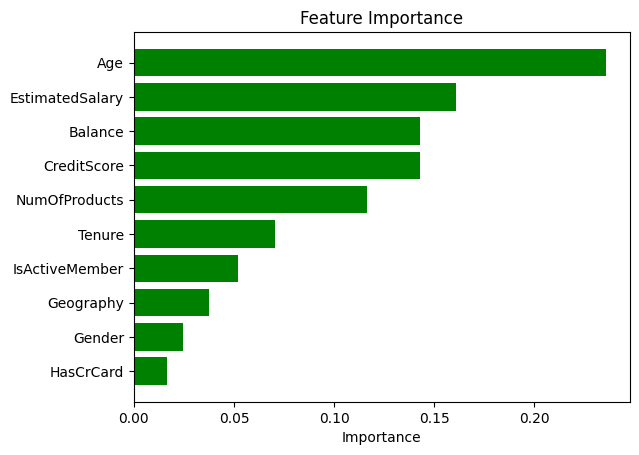

In [85]:
features = dt_feature_importance_df['Feature'].tolist()
importances = dt_feature_importance_df['Importance'].tolist()

fig, ax = plt.subplots()
ax.barh(features, importances, color='g')
ax.invert_yaxis()
ax.set_xlabel('Importance')
ax.set_title('Feature Importance')
plt.show()

# **DUMMY**

In [86]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,1.0,42.0,2,0.00,1,1,1,101348.88,1
1,608,2,1.0,41.0,1,83807.86,1,0,1,112542.58,0
2,502,1,1.0,42.0,8,159660.80,3,1,0,113931.57,1
3,699,1,1.0,39.0,1,0.00,2,0,0,93826.63,0
4,850,2,1.0,43.0,2,125510.82,1,1,1,79084.10,0


In [87]:
dummy= {
    'CreditScore': [600],
    'Geography': [2],
    'Gender': [2.0],
    'Age': [21.0],
    'Tenure': [1],
    'Balance': [1500000],
    'NumOfProducts': [3],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'EstimatedSalary': [93826.63],
    }

In [88]:
df_dummy = pd.DataFrame(dummy)

# Make predictions using the trained models
knn_predictions = knn.predict(df_dummy)
dt_predictions = dt.predict(df_dummy)
rf_predictions = rf.predict(df_dummy)

In [89]:
# Add columns for predicted labels
df_dummy['KNN_Predictions'] = knn_predictions
df_dummy['DT_Predictions'] = dt_predictions
df_dummy['RF_Predictions'] = rf_predictions

In [90]:
df_dummy

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,KNN_Predictions,DT_Predictions,RF_Predictions
0,600,2,2.0,21.0,1,1500000,3,1,1,93826.63,1,1,1
